<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 194.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 189.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 163.6 MB/s eta 0:00:00


In [22]:
!pip install matplotlib_venn

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 184.0 MB/s eta 0:00:0000:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45387 sha256=471828d9ec9ce72f61a5ef4cf003e0ee34f67b60e0dd54b049caa4cd1fbe0850
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib_venn


In [23]:
from collections import Counter
from matplotlib_venn import venn2

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

### Step 3: Handle Missing Data


In [4]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [5]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)


Missing Values Before Handling:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [7]:
mode_job_sat = df['JobSat'].mode()[0]  # Get the first mode in case of ties
df['JobSat'].fillna(mode_job_sat, inplace=True)

# RemoteWork: Fill missing values with the mode (categorical column)
mode_remote_work = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(mode_remote_work, inplace=True)

/tmp/ipykernel_299/1497907500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(mode_job_sat, inplace=True)
/tmp/ipykernel_299/1497907500.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [8]:
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values After Handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [10]:
df['JobSat'].value_counts()

JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

In [11]:
df['YearsCodePro'].value_counts()

YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

In [12]:
# --- Optimize Employment Column ---

# Clean the 'Employment' column by stripping extra whitespace and standardizing common terms
df['Employment'] = df['Employment'].str.strip().str.replace(r'\s*,\s*', ',', regex=True)

# Get value counts of the 'Employment' column
emp_value_counts = df['Employment'].value_counts()

# Identify employment types with less than 1% frequency
threshold = len(df) * 0.01
infrequent_emp_types = emp_value_counts[emp_value_counts < threshold].index

# 1. Define a function to map combined employment statuses
def map_employment_status(status_string):
    """
    Maps a string describing employment status to a simplified, standardized form.

    Args:
        status_string (str): A string containing one or more employment statuses
                             separated by semicolons.

    Returns:
        str: A simplified employment status.  Returns 'Other' if no mapping is found.
    """
    status_string = status_string.lower()  # Convert to lowercase for easier matching

    if "full-time" in status_string:
        return "Employed, full-time"
    elif "part-time" in status_string:
        return "Employed, part-time"
    elif "independent contractor" in status_string or "freelancer" in status_string:
        return "Independent contractor, freelancer, or self-employed"
    elif "not employed" in status_string:
        if "looking for work" in status_string:
            return "Not employed, but looking for work"
        else:
            return "Not employed, and not looking for work"
    elif "student" in status_string:
        return "Student" #Simplifying Student Status
    elif "retired" in status_string:
        return "Retired"
    else:
        return "Other"  # Catch-all for any unmapped status

# Apply the mapping function to the 'Employment' column
df['Employment'] = df['Employment'].apply(map_employment_status)

# Group these infrequent types into 'Other' category
df['Employment'] = df['Employment'].replace(infrequent_emp_types, 'Other')


# Verify the change
print("\nValue Counts of Optimized Employment Column:")
print(df['Employment'].value_counts())


Value Counts of Optimized Employment Column:
Employment
Employed, full-time                                     52717
Independent contractor, freelancer, or self-employed     5363
Employed, part-time                                      3250
Not employed, but looking for work                       3036
Other                                                    1071
Name: count, dtype: int64


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


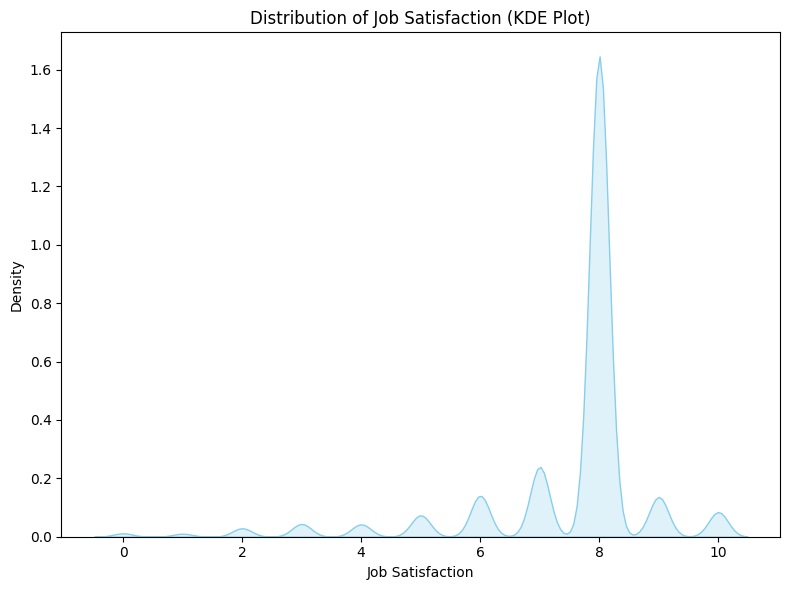

In [13]:
# --- Visualize Job Satisfaction (JobSat) ---
plt.figure(figsize=(8, 6))
sns.kdeplot(df['JobSat'], fill=True, color='skyblue')
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1000x600 with 0 Axes>

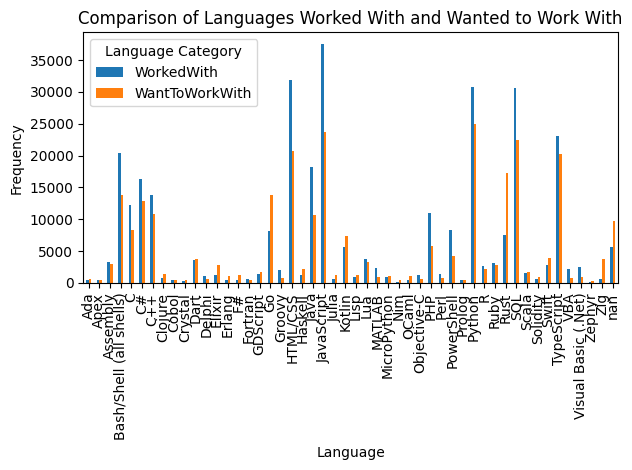

In [38]:
# 2. Split the language strings into lists
languages_worked_with = df['LanguageHaveWorkedWith'].astype(str).str.split(';').explode().str.strip()
languages_want_to_work_with = df['LanguageWantToWorkWith'].astype(str).str.split(';').explode().str.strip() 
worked_with_counts = languages_worked_with.value_counts()
want_to_work_counts = languages_want_to_work_with.value_counts()
# 3. Combine the counts into a single DataFrame for plotting
language_counts_df = pd.DataFrame({
    'WorkedWith': worked_with_counts,
    'WantToWorkWith': want_to_work_counts
}).fillna(0)  # Fill NaN with 0 for missing counts
plt.figure(figsize = (10, 6))
ax = language_counts_df.plot(kind='bar', rot=90)
plt.title('Comparison of Languages Worked With and Wanted to Work With')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.legend(title='Language Category')
plt.tight_layout()  

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

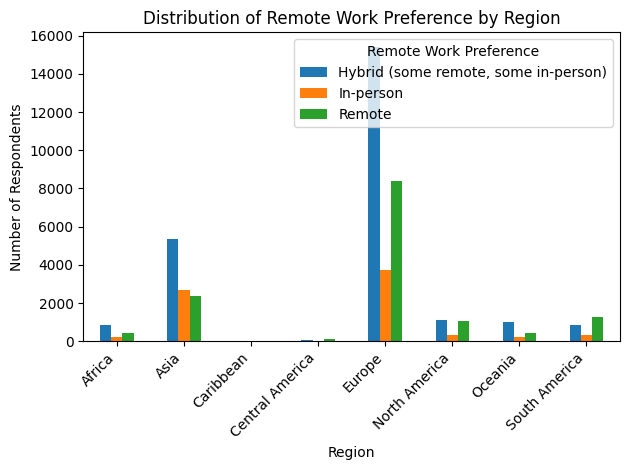

In [46]:
# 3. Define a dictionary to map countries to regions
region_map = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Colombia': 'South America',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Egypt': 'Africa',
    'Russian Federation': 'Asia',  # Corrected from 'Europe' to 'Asia'
    'Turkey': 'Asia', # Added Turkey
    'Iran, Islamic Republic of': 'Asia', # Added Iran
    'Indonesia': 'Asia',
    'Malaysia': 'Asia',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',
    'Saudi Arabia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Philippines': 'Asia',
    'Ireland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Finland': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Portugal': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Estonia': 'Europe',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Ukraine': 'Europe',
    'Morocco': 'Africa',
    'Ghana': 'Africa',
    'Kenya': 'Africa',
    'Angola': 'Africa',
    'Algeria': 'Africa',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'Ethiopia': 'Africa',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Myanmar': 'Asia',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'Qatar': 'Asia',
    'Bahrain': 'Asia',
    'Jordan': 'Asia',
    'Lebanon': 'Asia',
    'Palestine': 'Asia',
    'Iraq': 'Asia',
    'Yemen': 'Asia',
    'Syrian Arab Republic': 'Asia',
    'Kazakhstan': 'Asia',
    'Uzbekistan': 'Asia',
    'Azerbaijan': 'Asia',
    'Georgia': 'Asia',
    'Armenia': 'Asia',
    'Mongolia': 'Asia',
    'North Korea': 'Asia',
    'Taiwan': 'Asia',
    'Hong Kong (S.A.R.)': 'Asia',
    'Chile': 'South America',
    'Peru': 'South America',
    'Ecuador': 'South America',
    'Venezuela, Bolivarian Republic of...': 'South America',
    'Uruguay': 'South America',
    'Paraguay': 'South America',
    'Bolivia': 'South America',
    'Cuba': 'Central America',
    'Dominican Republic': 'Central America',
    'Guatemala': 'Central America',
    'Haiti': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Jamaica': 'Caribbean',
    'Trinidad and Tobago': 'Caribbean',
    'Puerto Rico': 'Caribbean',
    'Suriname': 'South America',
    'Guyana': 'South America',
    'Belize': 'Central America',
    'Barbados': 'Caribbean',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Solomon Islands': 'Oceania',
    'New Caledonia (Territory of France)': 'Oceania',
    'French Polynesia': 'Oceania',
    'Guam': 'Oceania',
    'Micronesia, Federated States of...': 'Oceania',
    'Vanuatu': 'Oceania',
    'Marshall Islands': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Palau': 'Oceania',
    'Kiribati': 'Oceania',
    'Nauru': 'Oceania',
    'Tuvalu': 'Oceania',
    'Samoa': 'Oceania',
    'Cook Islands': 'Oceania',
    'Tonga': 'Oceania',
    'Niue': 'Oceania',
    'Tokelau': 'Oceania',
    'Antarctica': 'Other',  # Add Antarctica
    'Congo, Republic of the...': 'Africa', # Added
    'Congo, Democratic Republic of the...': 'Africa', # Added
    'Central African Republic': 'Africa', # Added
    'Bosnia and Herzegovina': 'Europe', # Added
    'Serbia': 'Europe', # Added
    'Croatia': 'Europe', # Added
    'Slovenia': 'Europe', # Added
    'Estonia': 'Europe', # Added
    'Latvia': 'Europe', # Added
    'Lithuania': 'Europe', # Added
    'Moldova': 'Europe', # Added
    'Albania': 'Europe', # Added
    'North Macedonia': 'Europe', # Added
    'Malta': 'Europe', # Added
    'Cyprus': 'Europe', # Added
    'Luxembourg': 'Europe', # Added
    'Montenegro': 'Europe', # Added
    'Iceland': 'Europe', # Added
    'Andorra': 'Europe', # Added
    'Monaco': 'Europe', # Added
    'Liechtenstein': 'Europe', # Added
    'San Marino': 'Europe', # Added
    'Vatican City State': 'Europe', # Added
    'Faroe Islands': 'Europe', # Added
    'Greenland': 'North America', # Added
    'Saint Pierre and Miquelon': 'North America', # Added
    'Anguilla': 'Caribbean', # Added
    'Antigua and Barbuda': 'Caribbean', # Added
    'Aruba': 'Caribbean', # Added
    'Bahamas': 'Caribbean', # Added
    'Bermuda': 'North America', # Added
    'British Virgin Islands': 'Caribbean', # Added
    'Cayman Islands': 'Caribbean', # Added
    'Dominica': 'Caribbean', # Added
    'Grenada': 'Caribbean', # Added
    'Guadeloupe': 'Caribbean', # Added
    'Martinique': 'Caribbean', # Added
    'Montserrat': 'Caribbean', # Added
    'Netherlands Antilles': 'Caribbean', # Added
    'Saint Kitts and Nevis': 'Caribbean', # Added
    'Saint Lucia': 'Caribbean', # Added
    'Saint Vincent and the Grenadines': 'Caribbean', # Added
    'Turks and Caicos Islands': 'Caribbean', # Added
    'United States Virgin Islands': 'Caribbean', # Added
    'South Sudan': 'Africa', # Added
    'Western Sahara': 'Africa', # Added
    'Somalia': 'Africa', # Added
    'Djibouti': 'Africa', # Added
    'Comoros': 'Africa', # Added
    'Seychelles': 'Africa', # Added
    'Equatorial Guinea': 'Africa', # Added
    'Gabon': 'Africa', # Added
    'Republic of the Congo': 'Africa', # Added
    'Sao Tome and Principe': 'Africa', # Added
    'Chad': 'Africa', # Added
    'Niger': 'Africa', # Added
    'Mali': 'Africa', # Added
    'Burkina Faso': 'Africa', # Added
    'Benin': 'Africa', # Added
    'Mauritania': 'Africa', # Added
    'Senegal': 'Africa', # Added
    'Gambia': 'Africa', # Added
    'Guinea-Bissau': 'Africa', # Added
    'Guinea': 'Africa', # Added
    'Sierra Leone': 'Africa', # Added
    'Liberia': 'Africa', # Added
    'Ivory Coast': 'Africa', # Added
    'Togo': 'Africa' # Added

}


# 4. Map the 'Country' column to 'Region'
df['Region'] = df['Country'].map(region_map)

# 5. Group by 'Region' and count the occurrences of each 'RemoteWork' category
remote_work_by_region = df.groupby('Region')['RemoteWork'].value_counts().unstack(fill_value=0)

# 6. Plot the grouped bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
remote_work_by_region.plot(kind='bar', stacked=False)
plt.title('Distribution of Remote Work Preference by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Remote Work Preference')
plt.tight_layout()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


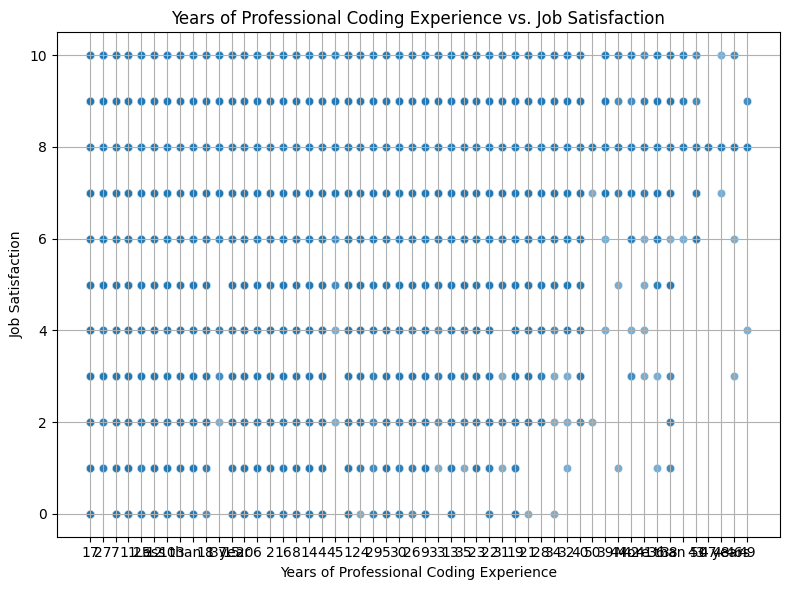

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsCodePro', y='JobSat', data=df, alpha=0.6)  # Added alpha for better visualization
plt.title('Years of Professional Coding Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()




In [52]:
# 1. Check if the columns exist
if 'YearsCodePro' not in df.columns or 'JobSat' not in df.columns:
    raise KeyError("Columns 'YearsCodePro' or 'JobSat' not found in DataFrame.")

# 2. Calculate Pearson correlation coefficient
pearson_corr = df['YearsCodePro'].corr(df['JobSat'], method='pearson')
print(f"\nPearson Correlation Coefficient: {pearson_corr:.3f}")

# 3. Calculate Spearman rank correlation coefficient
spearman_corr = df['YearsCodePro'].corr(df['JobSat'], method='spearman')
print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.3f}")



ValueError: could not convert string to float: 'Less than 1 year'

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.



Cross-tabulation of Education Level vs. Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1415   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      20806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   12877   
Primary/elementary school                                           775   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2365   
Secondary school (e.g. American high school, Ge...                 4442   
Some college/university study without earning a...                 5798   
Something else                                                      604   

Employment                                          Employed, part-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)      

/tmp/ipykernel_299/1150138157.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

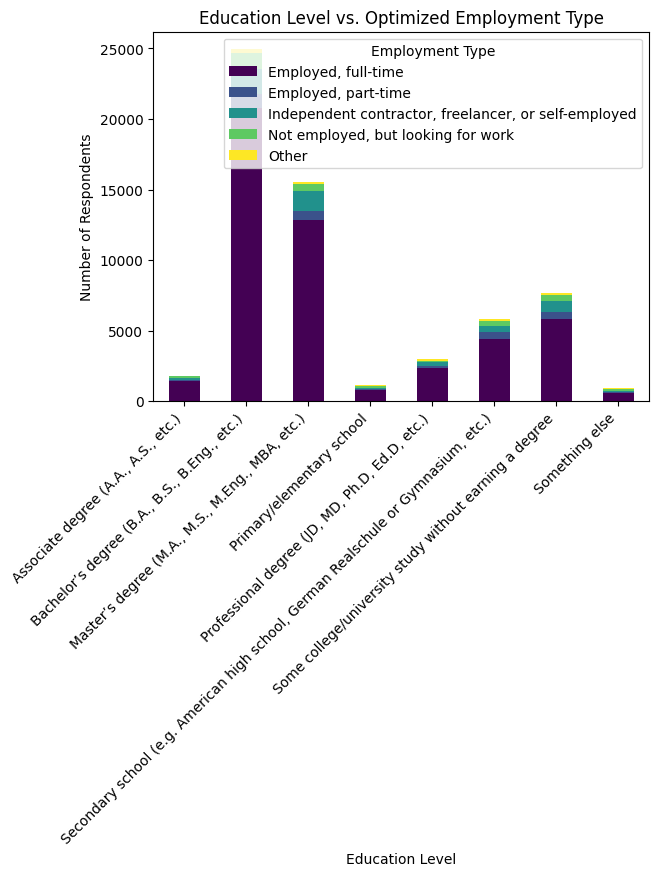

In [47]:
edlevel_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])
print("\nCross-tabulation of Education Level vs. Employment Type:")
print(edlevel_employment_crosstab)

plt.figure(figsize=(12, 6))
edlevel_employment_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Education Level vs. Optimized Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [48]:
# --- Save the modified DataFrame to a new CSV file ---
df.to_csv('survey_data_modified.csv', index=False)  # index=False prevents writing the DataFrame index to the file

print("\nModified DataFrame saved to 'survey_data_modified.csv'")


Modified DataFrame saved to 'survey_data_modified.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
